In [1]:
#importy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve, auc

In [2]:
#wczytanie danych
data_stroke = pd.read_csv("healthcare-dataset-stroke-data.csv", comment="#", sep=',')
data_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#INFORMACJE O DANYCH
#rózne typy danych - trzeba pozmieniać
#co zrobić z hypertension i heart_disease - to kategoryczne???
# to samo do ever_maried, work_type, residence_type, smiking_status
type(data_stroke)

pandas.core.frame.DataFrame

In [4]:
data_stroke.shape

(5110, 12)

In [5]:
data_stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
data_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
#usunięcie ID

In [8]:
data_stroke.drop('id', axis=1, inplace=True)

In [9]:
data_stroke.isnull().mean() * 100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [10]:
#for col in ['bmi']:
    #data_stroke[col].fillna(adult[col].mode()[0], inplace=True)
    #Ponieważ braki są niewielkie i tylko dla kolumn kategorycznych użyjemy imputacji modą:?? - z projektu faceta

In [11]:
#zmienie kategorie
#pozmieniam zmienne objekt na category - jak to zrobić w jednej linijce???
data_stroke.gender = data_stroke.gender.astype('category')

In [12]:
data_stroke.hypertension = data_stroke.hypertension.astype('category')
data_stroke.heart_disease = data_stroke.heart_disease.astype('category')
data_stroke.ever_married = data_stroke.ever_married.astype('category')
data_stroke.work_type = data_stroke.work_type.astype('category')
data_stroke.Residence_type = data_stroke.Residence_type.astype('category')
data_stroke.smoking_status = data_stroke.smoking_status.astype('category')
data_stroke.stroke = data_stroke.stroke.astype('category')

In [13]:
data_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   category
 3   heart_disease      5110 non-null   category
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   category
dtypes: category(8), float64(3)
memory usage: 161.0 KB


In [14]:
data_stroke.describe().round(2)

,age,avg_glucose_level,bmi
count,5110.00,5110.00,4909.00
mean,43.23,106.15,28.89
std,22.61,45.28,7.85
min,0.08,55.12,10.30
25%,25.00,77.24,23.50
50%,45.00,91.88,28.10
75%,61.00,114.09,33.10
max,82.00,271.74,97.60


In [15]:
#USUWANIE/INPUTACJA BRAKÓW DANYCH
data_stroke_nan_index = data_stroke.index[data_stroke.isnull().any(axis=1)]
data_stroke.iloc[data_stroke_nan_index]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [16]:
#BMI - barkuje 201 kolumn - ?? - trzeba zrobić coś na NaNami
#wszystkich obserwacji 5110 (100%), więc 201 to będzie niecałe 4%, zacznę od usunięcia i zobaczę co dalej będzie
data_stroke.dropna(inplace=True)

In [17]:
#mam dane bez nonow
data_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [18]:
data_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             4909 non-null   category
 1   age                4909 non-null   float64 
 2   hypertension       4909 non-null   category
 3   heart_disease      4909 non-null   category
 4   ever_married       4909 non-null   category
 5   work_type          4909 non-null   category
 6   Residence_type     4909 non-null   category
 7   avg_glucose_level  4909 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     4909 non-null   category
 10  stroke             4909 non-null   category
dtypes: category(8), float64(3)
memory usage: 192.9 KB


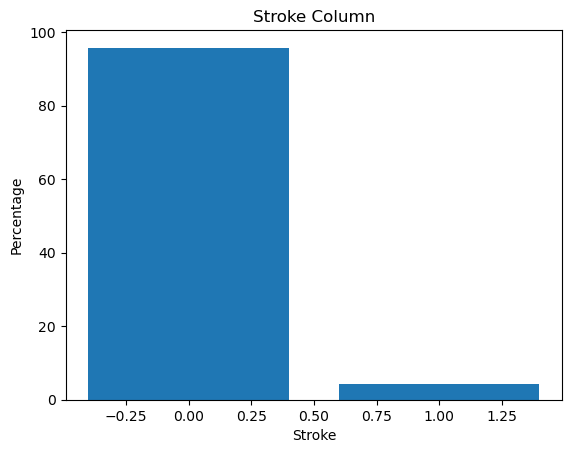

In [19]:
#Przy klasyfikacji jednym z najwazniejszych pytań podczas eksploracyjnej analizy danych jest zbalansowanie zmiennej zaleznej a raczej jego brak. W przypadku niezbalansowanych danych dużo trudniej jest zbudować dobrze działający klasyfikator.

counts = data_stroke['stroke'].value_counts()
percentages = counts / counts.sum() * 100

plt.bar(percentages.index, percentages.values) # zmienić na yes/no poziomą wartość
plt.title('Stroke Column')
plt.xlabel('Stroke')
plt.ylabel('Percentage')
plt.show()

In [20]:
#poznaje kolejne kolumny nietypowe
data_stroke.groupby('gender').count()

#gender ma male, female ( w miarę równo rozłożone) i kolumne inne(1 odczyt) - MOŻE USUNAĆ


,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,
Female,2897,2897,2897,2897,2897,2897,2897,2897,2897,2897
Male,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
Other,1,1,1,1,1,1,1,1,1,1


In [21]:
data_stroke.drop(data_stroke[data_stroke['gender']=='Other'].index, inplace=True) ###tu usunąc tego other!!!

In [22]:
data_stroke.groupby('gender').count()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,
Female,2897,2897,2897,2897,2897,2897,2897,2897,2897,2897
Male,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
Other,0,0,0,0,0,0,0,0,0,0


In [23]:
data_stroke.groupby('ever_married').count()
#kolumny yes, no(trochę nierówno 1727:3353)

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
ever_married,,,,,,,,,,
No,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704
Yes,3204,3204,3204,3204,3204,3204,3204,3204,3204,3204


In [24]:
data_stroke.groupby('work_type').count()
#5 rodzajów - govt job - praca rządowa,

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
work_type,,,,,,,,,,
Govt_job,630,630,630,630,630,630,630,630,630,630
Never_worked,22,22,22,22,22,22,22,22,22,22
Private,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810
Self-employed,775,775,775,775,775,775,775,775,775,775
children,671,671,671,671,671,671,671,671,671,671


In [25]:
data_stroke.groupby('Residence_type').count()
#tylko miejskie i wiejskie(równo ułożone)

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
Residence_type,,,,,,,,,,
Rural,2418,2418,2418,2418,2418,2418,2418,2418,2418,2418
Urban,2490,2490,2490,2490,2490,2490,2490,2490,2490,2490


In [26]:
data_stroke.groupby('smoking_status').count()
#4 rodzaje - w tym jeden - unknown

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,,,,
Unknown,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483
formerly smoked,836,836,836,836,836,836,836,836,836,836
never smoked,1852,1852,1852,1852,1852,1852,1852,1852,1852,1852
smokes,737,737,737,737,737,737,737,737,737,737


In [27]:
data_stroke.groupby('stroke').count()
#zmienna celu
#tu mamy dwa rodzaje - duża nierówność prawie 5000:250

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,
0,4699,4699,4699,4699,4699,4699,4699,4699,4699,4699
1,209,209,209,209,209,209,209,209,209,209


#OUTLIERY
#wiek i glukoza wyglądają znośnie, BMI ma dziwne wyniki

    poniżej 16 - wygłodzenie
    16 - 16.99 - wychudzenie
    17 - 18.49 - niedowagę
    18.5 - 24.99 - wagę prawidłową
    25.0 - 29.9 - nadwagę
    30.0 - 34.99 - I stopień otyłości
    35.0 - 39.99 - II stopień otyłości
    powyżej 40.0 - otyłość skrajną


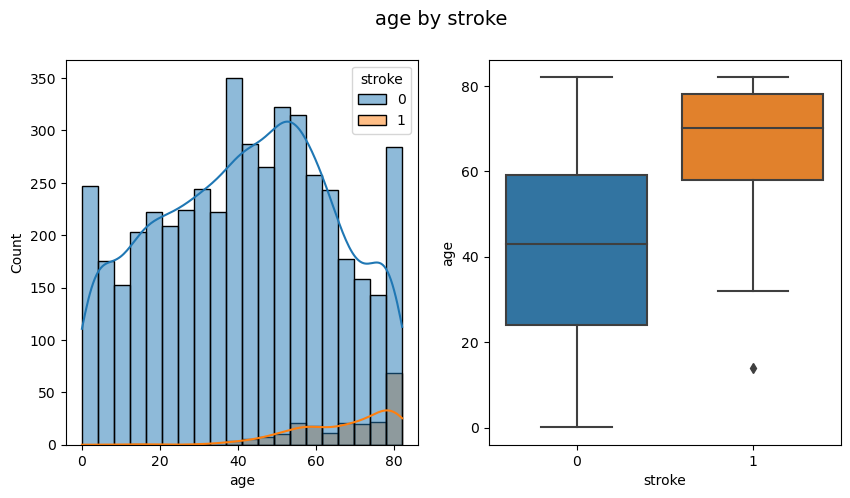

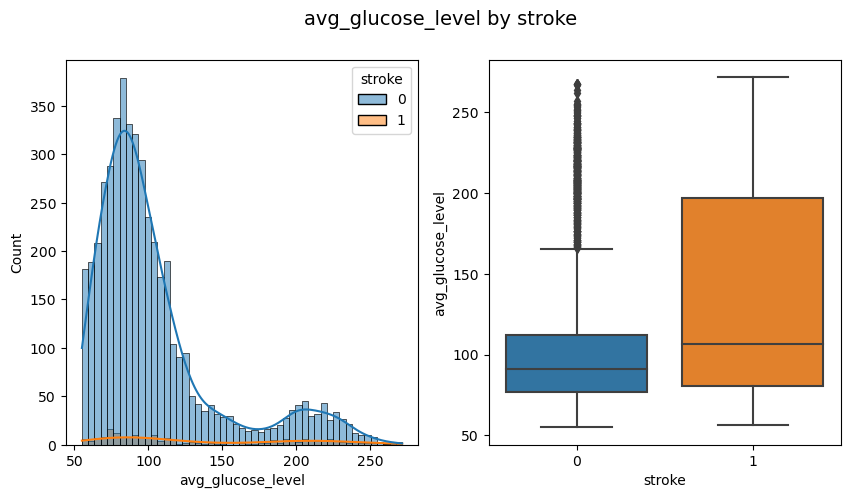

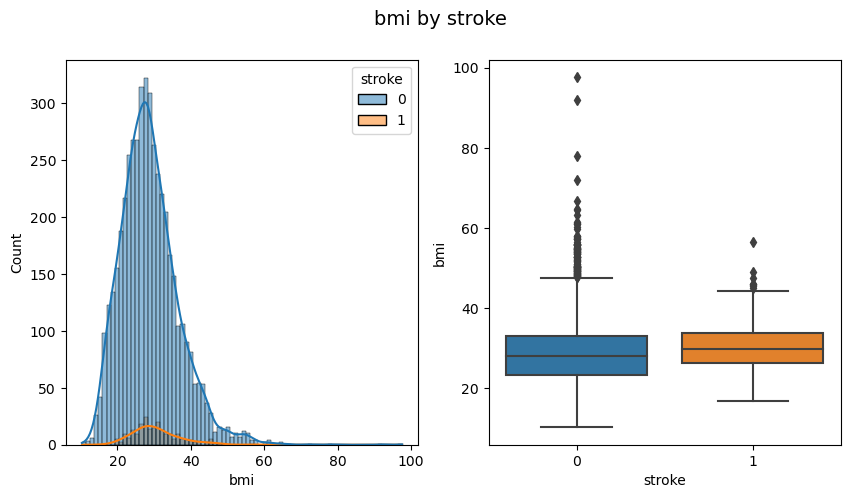

In [28]:
num_cols = ['age', 'avg_glucose_level', 'bmi']

for col in num_cols:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
    sns.histplot(data=data_stroke, x=col, hue='stroke', kde=True, ax=ax1)
    sns.boxplot(data=data_stroke, x='stroke', y=col, ax=ax2)
    fig.suptitle(f'{col} by stroke', fontsize=14)
    plt.show()

In [29]:
#Szukam outlierów metodą z_scores
data_stroke_imputed = pd.DataFrame(data_stroke, columns=['age', 'avg_glucose_level', 'bmi'])

means = np.mean(data_stroke_imputed, axis=0)
sds = np.std(data_stroke_imputed, axis=0)
z_scores = np.abs(data_stroke_imputed - means) / sds
outliers = np.where(z_scores > 3)

print(outliers)

(array([  27,   38,   62,   80,   94,  103,  104,  112,  125,  158,  161,
        182,  204,  216,  218,  230,  263,  290,  293,  302,  317,  344,
        388,  423,  498,  506,  517,  591,  616,  624,  659,  666,  704,
        710,  734,  872, 1003, 1009, 1012, 1019, 1053, 1144, 1164, 1235,
       1252, 1311, 1362, 1379, 1449, 1452, 1477, 1482, 1502, 1513, 1543,
       1573, 1797, 1965, 1975, 2019, 2027, 2073, 2093, 2146, 2161, 2180,
       2215, 2324, 2345, 2421, 2431, 2443, 2508, 2568, 2624, 2636, 2685,
       2708, 2781, 2917, 2944, 3087, 3186, 3233, 3235, 3320, 3347, 3426,
       3443, 3443, 3523, 3536, 3602, 3654, 3737, 3758, 3804, 3871, 3976,
       4009, 4029, 4045, 4068, 4167, 4172, 4223, 4262, 4271, 4284, 4289,
       4410, 4521, 4645, 4713, 4716, 4756, 4787, 4837], dtype=int64), array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2

In [30]:
data_stroke_imputed.iloc[outliers[0][outliers[1] == 2]]

,age,avg_glucose_level,bmi
113,45.0,224.10,56.6
258,74.0,205.84,54.6
270,57.0,129.54,60.9
333,52.0,82.24,54.7
358,52.0,78.40,64.8
430,52.0,72.79,54.7
466,61.0,170.05,60.2
544,42.0,210.48,71.9
637,56.0,112.43,54.6
662,28.0,87.43,55.7


In [31]:
data_stroke = data_stroke[data_stroke["bmi"] <= 52] #powyżej 60 to chyba niemożliwe 

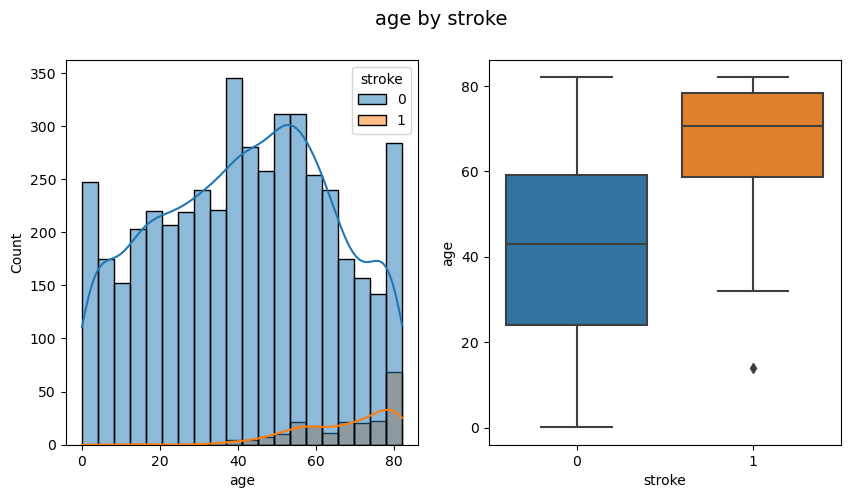

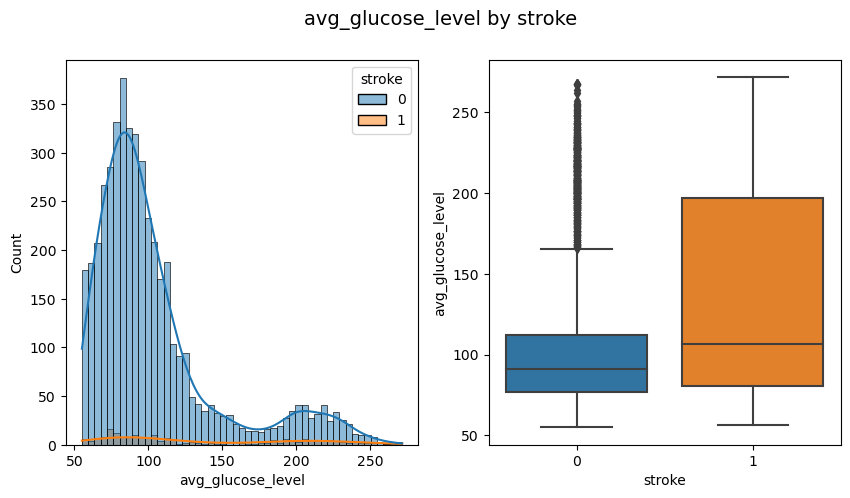

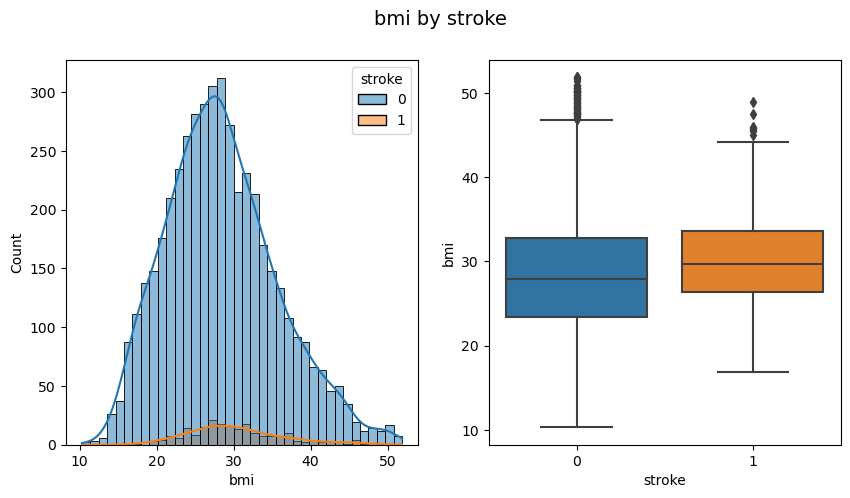

In [32]:
num_cols = ['age', 'avg_glucose_level', 'bmi']

for col in num_cols:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
    sns.histplot(data=data_stroke, x=col, hue='stroke', kde=True, ax=ax1)
    sns.boxplot(data=data_stroke, x='stroke', y=col, ax=ax2)
    fig.suptitle(f'{col} by stroke', fontsize=14)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


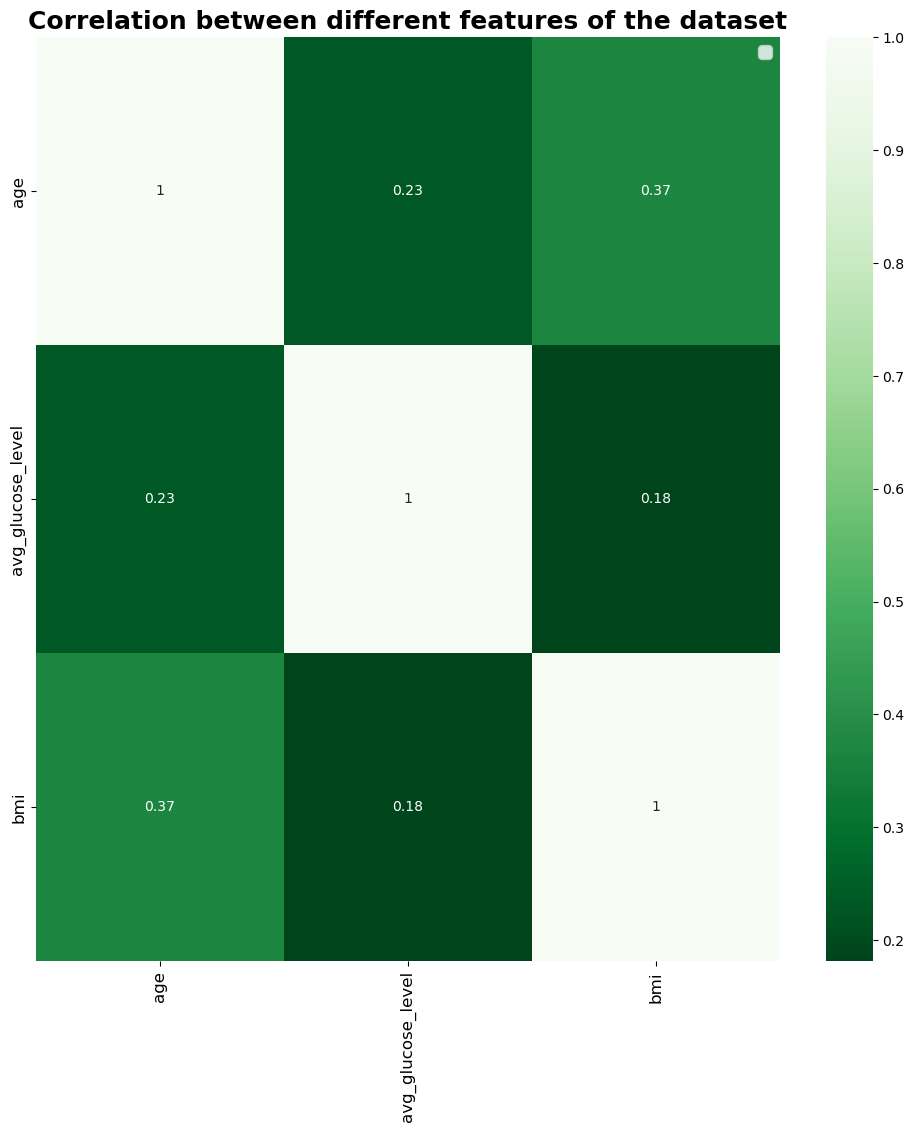

In [33]:
#szukam korelacji
plt.figure(figsize = (12,12))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(data_stroke.corr(numeric_only = True), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

In [34]:
num_cols = ['age', 'avg_glucose_level', 'bmi']
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [35]:
# Tworzenie obiektu skaler
scaler = StandardScaler()
num_cols = ['age', 'avg_glucose_level', 'bmi']

# Dopasowanie skalera do danych i wykonanie transformacji
data_stroke= scaler.fit_transform(data_stroke[num_cols])

print(data_stroke)

[[ 1.06728043  2.79793067  1.12893759]
 [ 1.6414639   0.01870216  0.55481631]
 [ 0.27225717  1.49716933  0.82087252]
 ...
 [-0.34609426 -0.50037994  0.28876011]
 [ 0.36059308  1.38533916 -0.41138779]
 [ 0.05141737 -0.44853964 -0.32737004]]


In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#import numpy as np

# Tworzenie obiektu skaler
#scaler = MinMaxScaler()

# Dopasowanie skalera do danych i wykonanie transformacji
#data_stroke_normalized1 = scaler.fit_transform(data_stroke[num_cols])

#print(data_stroke_normalized1)

In [ ]:
#from sklearn.preprocessing import RobustScaler
#import numpy as np

# Tworzenie obiektu skaler
#scaler = RobustScaler()

# Dopasowanie skalera do danych i wykonanie transformacji
#data_stroke_normalized3 = scaler.fit_transform(data_stroke[num_cols])

#print(data_stroke_normalized3)

In [37]:
#kodowanie zmiennych kateorycznych
# inicjalizacja OneHotEncoder
#encoder = OneHotEncoder()

# dopasowanie i transformacja danych
#data_stroke = encoder.fit_transform(data_stroke[cat_cols])

# wyświetlenie wyników
#print(data_stroke.toarray())

In [40]:
def generate_plots_and_tables_by_tagret(df: pd.DataFrame, target_column: str = "DefFlag",
                                        numeric_cols: list = [], categorical_cols: list = []) -> None:
    """
    Generate plots of the 'target_column' column with other columns in a pandas dataframe.
    If a column is a string or factor, a bar plot with grouping by 'target_column' will be created.
    If a column is continuous, a histogram, boxplot, and scatter plot with grouping by 'target_column' will be created.
    """
    for column in categorical_cols:
        print(column + ":")
        
        plt.figure(figsize=(8, 6))
            
        counts = df.groupby([column, target_column], group_keys=True).size()
        print(counts)
        counts_norm = counts.groupby(level=0, group_keys=False).apply(lambda x: 100 * x / x.sum())
        counts_norm = counts_norm.reset_index(name='percent')
        sns.barplot(x=column, y='percent', hue=target_column, data=counts_norm)
        plt.title(f"'stroke' vs '{column}'")
        plt.show()
            
    for column in numeric_cols:
        
        plt.figure(figsize=(18, 6))
            
        plt.subplot(1, 2, 1)
        sns.histplot(x=column, hue=target_column, data=df, kde=True)
        plt.title(f"'stroke' vs '{column}' (Histogram)")
            
        plt.subplot(1, 2, 2)
        sns.boxplot(x=target_column, y=column, data=df)
        plt.title(f"'stroke' vs '{column}' (Boxplot)")
            
        plt.tight_layout()
        plt.show()

In [42]:
num_cols = ['age', 'avg_glucose_level', 'bmi']
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
generate_plots_and_tables_by_tagret(data_stroke, 'stroke', num_cols, cat_cols)

gender:


AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

<Figure size 800x600 with 0 Axes>

In [ ]:
#płeć - nie ma znaczenia???
#hypertensjon, heart_diseanse - ma???
#wiek - ma???

In [43]:
# Wyodrębnienie predyktorów i zmiennej objaśnianej
X = data_stroke.drop(columns=['stroke'])
y = data_stroke.stroke

# Podział danych na zestaw uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [ ]:
# Budowa modelu regresji liniowej
model = LinearRegression()
results = model.fit(X_train, y_train)

# Predykcja wartości dla zbioru treningowego i testowego
y_train_pred = results.predict(X_train)
y_test_pred = results.predict(X_test)

# Błąd kwadratowy dla zbioru treningowego i testowego
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Błąd kwadratowy dla zbioru treningowego: ", mse_train)
print("Błąd kwadratowy dla zbioru testowego: ", mse_test)

# R^2 dla zbioru treningowego i testowego
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 dla zbioru treningowego: ", r2_train)
print("R^2 dla zbioru testowego: ", r2_test)